In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
import kagglehub

path = kagglehub.dataset_download("miadul/e-commerce-sales-transactions-dataset")
print(path)


/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 0.99M/0.99M [00:01<00:00, 732kB/s]

Extracting files...
/Users/areejkhurramkhurram/.cache/kagglehub/datasets/miadul/e-commerce-sales-transactions-dataset/versions/1


In [5]:
df = pd.read_csv(f"{path}/ecommerce_sales_34500.csv")
df.head()


,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male


In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['returned'] = df['returned'].map({'Yes': 1, 'No': 0})


In [7]:
overall_return_rate = df['returned'].mean() * 100
print(f"Overall Return Rate: {overall_return_rate:.2f}%")


Overall Return Rate: 5.52%


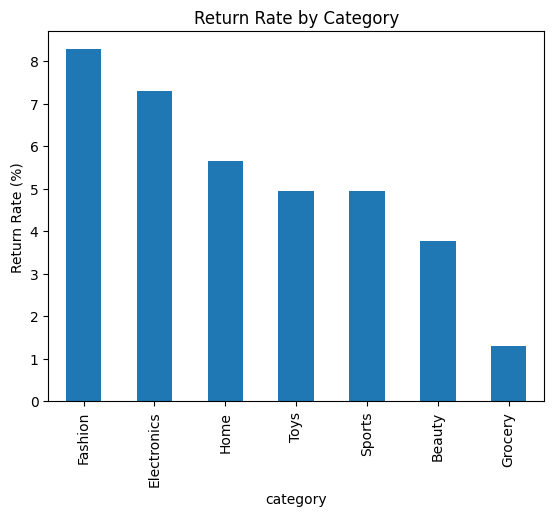

In [8]:
category_returns = (
    df.groupby('category')['returned']
    .mean()
    .sort_values(ascending=False) * 100
)

category_returns.plot(kind='bar')
plt.title('Return Rate by Category')
plt.ylabel('Return Rate (%)')
plt.show()


In [10]:
product_returns = (
    df.groupby('product_id')['returned']
    .mean()
    .sort_values(ascending=False)
)

product_returns.head(10)


product_id
P208743    1.0
P233534    1.0
P248597    1.0
P245530    1.0
P232592    1.0
P237983    1.0
P229530    1.0
P226933    1.0
P212764    1.0
P201840    1.0
Name: returned, dtype: float64

/var/folders/rj/fph81n416mb0lldd6qnfpttr0000gn/T/ipykernel_39773/4288293007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_returns = df.groupby(


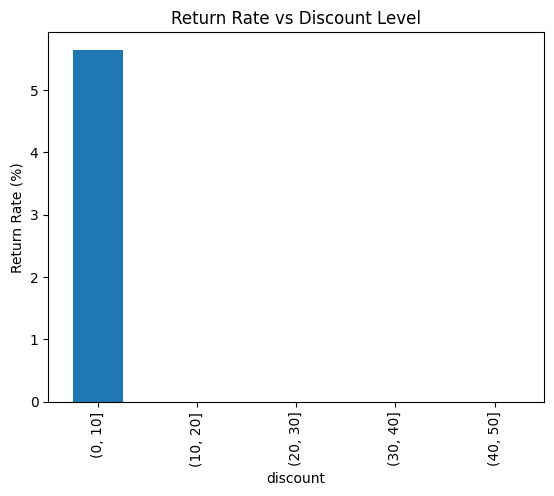

In [11]:
discount_returns = df.groupby(
    pd.cut(df['discount'], bins=[0,10,20,30,40,50])
)['returned'].mean() * 100

discount_returns.plot(kind='bar')
plt.title('Return Rate vs Discount Level')
plt.ylabel('Return Rate (%)')
plt.show()


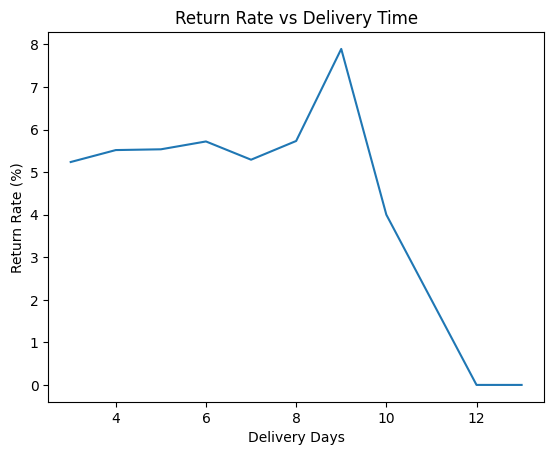

In [12]:
delivery_returns = (
    df.groupby('delivery_time_days')['returned']
    .mean() * 100
)

delivery_returns.plot()
plt.title('Return Rate vs Delivery Time')
plt.xlabel('Delivery Days')
plt.ylabel('Return Rate (%)')
plt.show()

